In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
infy = pd.read_csv(r'C:\Users\Shivam Singh Rajput\Desktop\kagle\time series\INFY.NS.csv',parse_dates=["Date"],index_col="Date")

In [16]:
infy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,0.79492,0.79883,0.78418,0.78418,-0.000426,870400
1996-01-08,0.78418,0.79102,0.77148,0.78662,-0.000427,2764800
1996-01-15,0.77637,0.78516,0.71289,0.76855,-0.000417,2150400
1996-01-22,0.77148,0.78125,0.75293,0.76758,-0.000417,1382400
1996-01-29,0.76563,0.83984,0.76318,0.83975,-0.000456,5171200


In [17]:
infy.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [18]:
infy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 1996-01-01 to 2020-01-27
Data columns (total 6 columns):
Open         1257 non-null float64
High         1257 non-null float64
Low          1257 non-null float64
Close        1257 non-null float64
Adj Close    1257 non-null float64
Volume       1257 non-null int64
dtypes: float64(5), int64(1)
memory usage: 68.7 KB


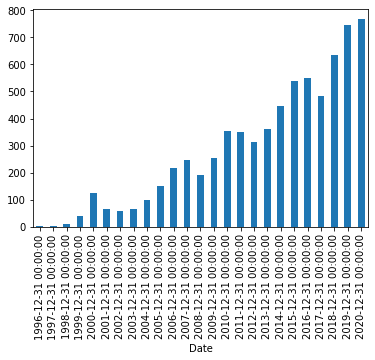

In [19]:
infy.Close.resample('Y').mean().plot(kind = "bar")

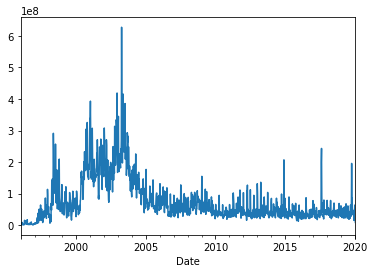

In [20]:
infy["Volume"].plot()
plt.show()


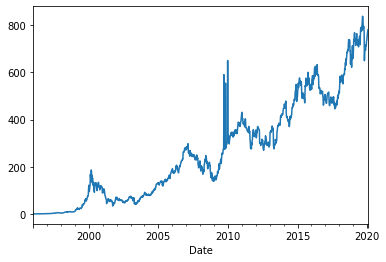

In [21]:
infy["Open"].plot()
plt.show()

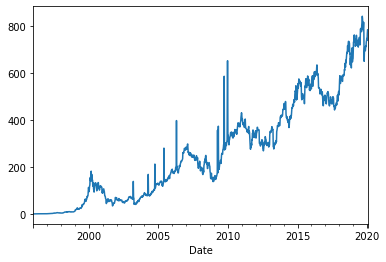

In [22]:
infy["Close"].plot()
plt.show()

In [23]:
infy["diff"] = (infy["Close"] - infy["Open"])

In [24]:
infy.head()

,Open,High,Low,Close,Adj Close,Volume,diff
Date,,,,,,,
1996-01-01,0.79492,0.79883,0.78418,0.78418,-0.000426,870400,-0.01074
1996-01-08,0.78418,0.79102,0.77148,0.78662,-0.000427,2764800,0.00244
1996-01-15,0.77637,0.78516,0.71289,0.76855,-0.000417,2150400,-0.00782
1996-01-22,0.77148,0.78125,0.75293,0.76758,-0.000417,1382400,-0.00390
1996-01-29,0.76563,0.83984,0.76318,0.83975,-0.000456,5171200,0.07412


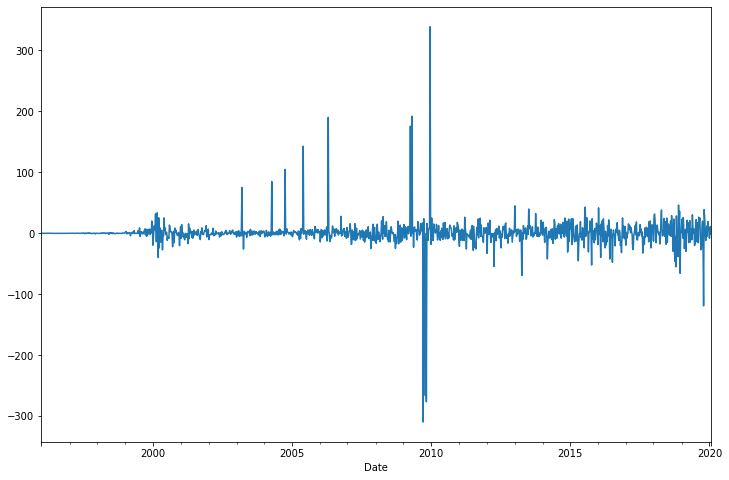

In [25]:
plt.figure(figsize=(12,8))
infy["diff"].plot()
plt.show()

In [26]:
infy[infy["diff"] < -300]

,Open,High,Low,Close,Adj Close,Volume,diff
Date,,,,,,,
2009-09-21,589.674988,589.674988,279.138,280.062012,107.016579,89576152,-309.612976


In [27]:
infy["2009-08-21":"2009-10-21"]

,Open,High,Low,Close,Adj Close,Volume,diff
Date,,,,,,,
2009-08-24,257.487000,275.500000,254.375000,273.830994,104.635582,48786888,16.343994
2009-08-31,270.700012,277.000000,265.000000,275.131012,105.132362,52741328,4.431000
2009-09-07,276.875000,284.362000,272.125000,283.424988,108.301636,42018192,6.549988
2009-09-14,278.480988,298.500000,278.480988,295.531006,112.927544,39055080,17.050018
2009-09-21,589.674988,589.674988,279.138000,280.062012,107.016579,89576152,-309.612976
2009-09-28,561.250000,585.250000,283.000000,585.250000,223.634262,29872312,24.000000
2009-10-05,289.375000,294.075012,270.825012,272.200012,104.012360,77283632,-17.174988
2009-10-12,273.750000,558.750000,273.131012,273.743988,104.602348,32829216,-0.006012
2009-10-19,548.750000,548.750000,271.274994,282.500000,111.917107,53140592,-266.250000


In [28]:
ts = infy["Open"]

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [30]:
decomposed = seasonal_decompose(ts,freq=52)

<Figure size 1296x432 with 0 Axes>

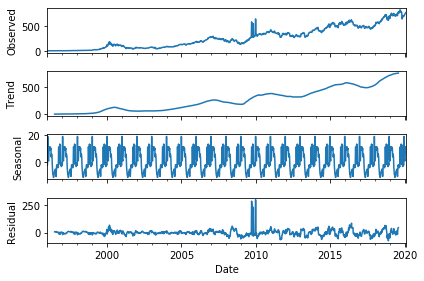

In [31]:
plt.figure(figsize=(18,6))
decomposed.plot()
plt.show()

In [32]:
from statsmodels.tsa.arima_model import ARIMA

In [33]:
from statsmodels.tsa.stattools import acf,pacf

In [34]:
acf_values = acf(ts, nlags = 100)

C:\Users\Shivam Singh Rajput\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [35]:
acf_values

array([1.        , 0.98979251, 0.98543968, 0.98147852, 0.97776955,
       0.97374014, 0.96995811, 0.96494202, 0.96324646, 0.95835644,
       0.95633214, 0.95155249, 0.94835832, 0.94675346, 0.94380351,
       0.93824922, 0.93442662, 0.93057604, 0.92660376, 0.92232333,
       0.9180606 , 0.91370055, 0.90977146, 0.90560192, 0.90174992,
       0.897822  , 0.8940109 , 0.88978868, 0.88553613, 0.88125486,
       0.87768001, 0.87379054, 0.86994429, 0.8658663 , 0.86177655,
       0.85799537, 0.85445369, 0.85074607, 0.84723588, 0.84379153,
       0.83987382, 0.83628941, 0.83287279, 0.82902206, 0.82540905,
       0.82219028, 0.81902266, 0.81581163, 0.81245184, 0.80891988,
       0.80534854, 0.80139054, 0.79763429, 0.79387527, 0.78964946,
       0.78563525, 0.78236565, 0.77873343, 0.77530311, 0.77131674,
       0.76754588, 0.76361045, 0.76051018, 0.7569096 , 0.75330952,
       0.74979313, 0.74685295, 0.74307035, 0.73917908, 0.73505352,
       0.73095086, 0.7269915 , 0.72285014, 0.71870617, 0.71464

In [36]:
x_axis = list(range(0,len(acf_values)))

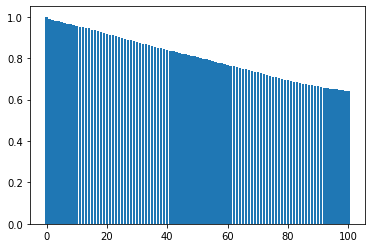

In [37]:
plt.bar(x_axis,acf_values)
plt.show()

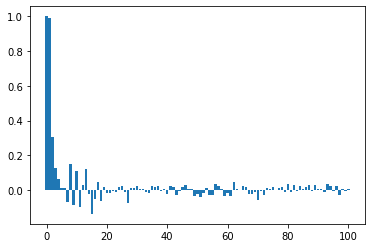

In [38]:
pacf_values = pacf(ts, nlags = 100)
x_axis = list(range(0,len(pacf_values)))
plt.bar(x_axis,pacf_values)
plt.show()

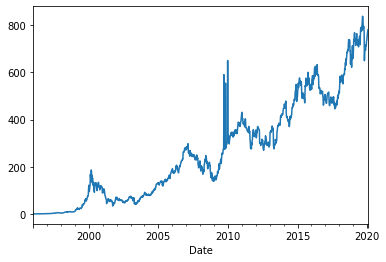

In [39]:
ts.plot()

In [40]:
ts_diff = ts - ts.shift()

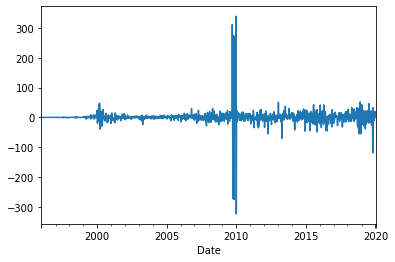

In [41]:
ts_diff.plot()

In [42]:
from statsmodels.tsa.stattools import adfuller

In [43]:
adfuller(ts)

(0.38324682585383174,
 0.9808575070082867,
 18,
 1238,
 {'1%': -3.4356431428057386,
  '5%': -2.8638774363142963,
  '10%': -2.568014482215048},
 11166.115927629722)

In [44]:
adfuller(ts_diff.dropna())

(-9.468395247284924,
 4.1697117216642014e-16,
 17,
 1238,
 {'1%': -3.4356431428057386,
  '5%': -2.8638774363142963,
  '10%': -2.568014482215048},
 11156.229998421175)

In [45]:
from sklearn.metrics import mean_squared_error

In [61]:
def evaluate_ts_model(ts,pdq):
    n_train = int(0.95 * len(ts))
    train = ts[:n_train]
    test = ts[n_train:]
    ts_train = [i for i in train]
    predictions = []
    for i in range(len(test)):
        arima_model = ARIMA(ts_train,pdq)
        arima_model_fit = arima_model.fit()
        pred = arima_model_fit.forecast(steps=1)[0][0]
        ts_train.append(test[i])
        predictions.append(pred)
    error = mean_squared_error(y_pred=predictions,y_true=test)
    #print(ts_train)

    return error

In [62]:
evaluate_ts_model(ts,(1,1,1))

773.6944957262908

In [95]:
def grid_search_arima(p_values,d_values,q_values,ts):
    for p in p_values:
        for d in d_values:
            for q in q_values:
                pdq = (p,d,q)
                error = evaluate_ts_model(ts,pdq)
                print(pdq,error)

In [96]:
grid_search_arima([0,1],[0,1],[0,1],ts)

(0, 0, 0) 237515.74519232885
(0, 0, 1) 70579.05794744656


C:\Users\Shivam Singh Rajput\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(0, 1, 0) 670.2325833376505
(0, 1, 1) 775.0986230594065
(1, 0, 0) 690.0837725152066


C:\Users\Shivam Singh Rajput\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Shivam Singh Rajput\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:221: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)
C:\Users\Shivam Singh Rajput\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Shivam Singh Rajput\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Shivam Singh Rajput\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-par

(1, 0, 1) 782.5098129059899
(1, 1, 0) 718.1392430873221
(1, 1, 1) 773.6944957262908
